# This program will examine the different factors that are related to a student's test score. 

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# Creating the data frame
students=pd.read_csv(os.path.join(os.getcwd(), "StudentsPerformance.csv"))
avgScores=pd.concat([students["math score"], students["reading score"], students["writing score"]], axis=1)
students = students.drop(["math score", "reading score", "writing score"], axis = 1)
students['mean'] = avgScores.mean(axis=1)

categoricalVariables, numericalVariables = list(students.columns)[:5], list(students.columns)[5:]
#One-Hot encoding the categorical variables
for CV in categoricalVariables:
    dummies = pd.get_dummies(students[CV])
    students = students.drop(CV, axis = 1)
    students = students.join(dummies)

#Categorizing the response variable
def gradeAssign(data):
    if data["mean"] >= 60:
        return "Passed"
    return "Failed"

students["grade"] = students.apply(gradeAssign, axis = 1)
students = students.drop(["mean",],axis=1)

X,y = students[students.columns[:-1]], students[students.columns[-1]]


In [3]:
from StudentsPerformance import StudentsPerformance
classifiers = {"K Nearest Neighbors": KNeighborsClassifier(n_neighbors = 23), "Logistic Regression": LogisticRegression(penalty = "none"), 
              "Support Vector Classification": SVC(), "Gaussian Naive Bayes": GaussianNB(),
               "Decision Trees": DecisionTreeClassifier(max_depth = 4, ccp_alpha = .001, max_features = "sqrt"),
               "Random Forests": RandomForestClassifier(ccp_alpha = .0001)}
SP = StudentsPerformance()
for classifier in classifiers:
    SP.ClassifierComparison(X,y,classifier, classifiers[classifier])

K Nearest Neighbors works best with 12 principal components with an average accuracy of 73.1
Logistic Regression works best with 8 principal components with an average accuracy of 73.8
Support Vector Classification works best with 5 principal components with an average accuracy of 72.9
Gaussian Naive Bayes works best with 8 principal components with an average accuracy of 73.9
Decision Trees works best with 11 principal components with an average accuracy of 72.3
Random Forests works best with 9 principal components with an average accuracy of 70.2


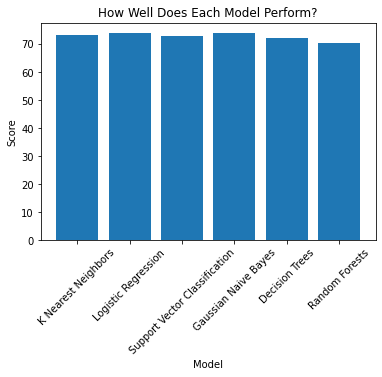

In [4]:
SP.graphComparisons()

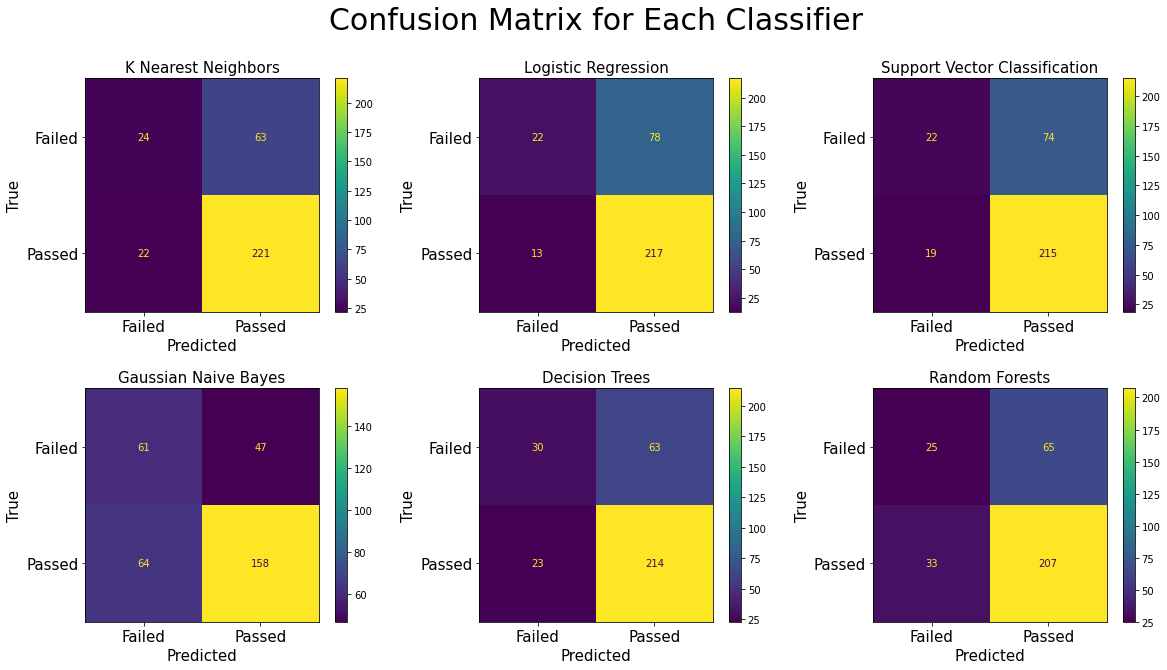

In [5]:
SP.confusionMatrix(X,y)